In [42]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from math import sqrt

### Load data

In [43]:
target = 'System_Load'
clean = pd.read_csv(str(Path("../data/interim/clean.csv")), parse_dates=True, infer_datetime_format=True,
                    index_col=0, low_memory=False)
predict = pd.read_csv(str(Path("../models/predictions.csv")), parse_dates=True, infer_datetime_format=True,
                      index_col=0, header=None, names=[target])
training_history = pd.read_csv(str(Path("../models/training_history.csv")), index_col=0)

In [44]:
train_end = '2017-12'
val_start = '2018-01'
val_end = '2018-06'
test_start = '2018-07'
    
train = clean.loc[:train_end]
validate = clean.loc[val_start:val_end]
test = clean.loc[test_start:]
    
train_y = train.pop(target)
validate_y = validate.pop(target)
test_y = test.pop(target)
    
persist_y = pd.Series(test_y.shift(1), index=test.index)
predict_y = predict[target]

predict_se = (test_y - predict_y)**2
persist_se = (test_y - persist_y)**2
predict_rmse = sqrt(predict_se.mean())
persist_rmse = sqrt(persist_se.mean())

### Inspect performance of predictor

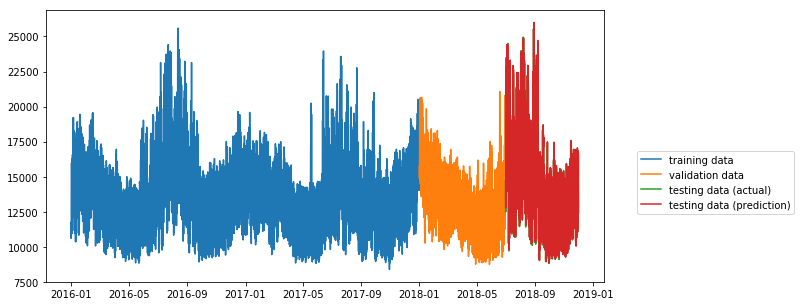

In [45]:
# Plot all data
fig, ax = plt.subplots(1,1,figsize=(10,5))
ax.plot(train_y, label='training data')   
ax.plot(validate_y, label='validation data')
ax.plot(test_y, label='testing data (actual)')
ax.plot(predict_y, label='testing data (prediction)')
ax.legend(bbox_to_anchor=(1.05,0.5))
plt.show()

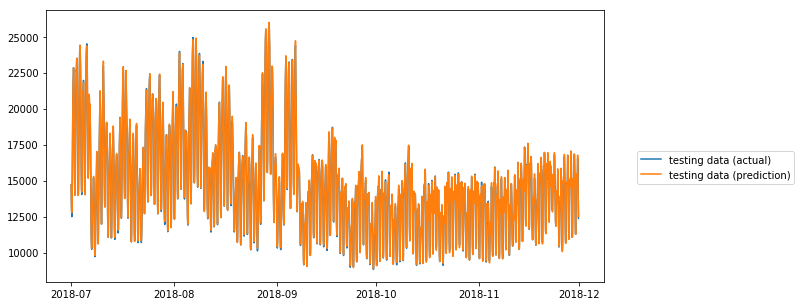

In [46]:
# Compare predictions to actual test data
fig, ax = plt.subplots(1,1,figsize=(10,5))
ax.plot(test_y, label='testing data (actual)')
ax.plot(predict_y, label='testing data (prediction)')
ax.legend(bbox_to_anchor=(1.05,0.5))
plt.show()

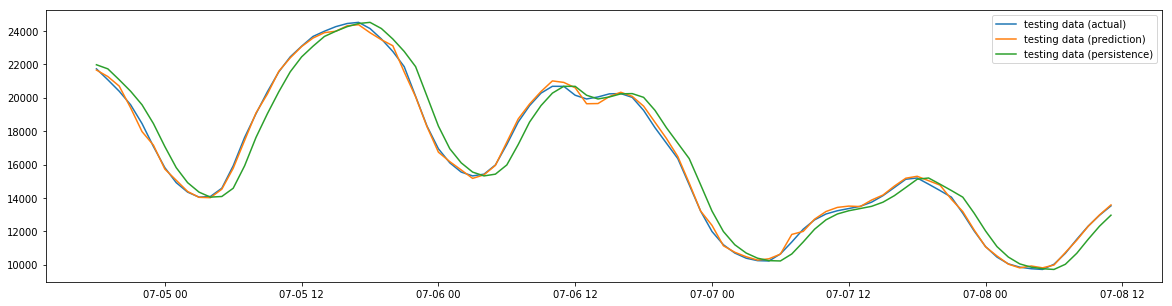

In [47]:
# Compare predictions to actual test data on a smaller scale
fig, ax = plt.subplots(1,1,figsize=(20,5))
ax.plot(test_y[90:180], label='testing data (actual)')
ax.plot(predict_y[90:180], label='testing data (prediction)')
ax.plot(persist_y[90:180], label='testing data (persistence)')
plt.legend()
plt.show()

### Inspect performance of model training

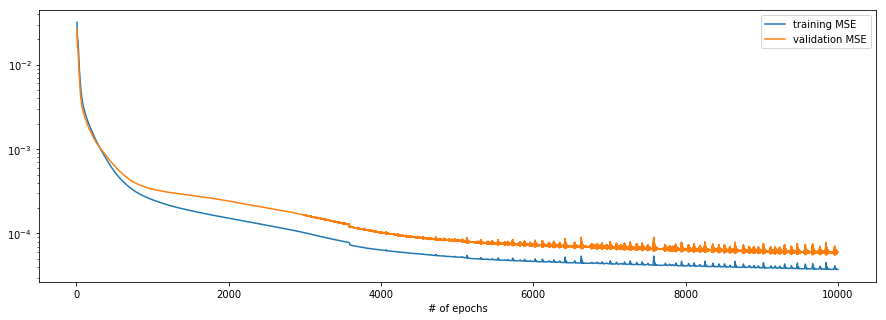

In [48]:
# Plot objective function (MSE) over training epoch
fig, ax = plt.subplots(1,1,figsize=(15,5))
ax.semilogy(training_history['loss'].iloc[10:], label='training MSE')
ax.semilogy(training_history['val_loss'].iloc[10:], label='validation MSE')
ax.set_xlabel('# of epochs')
plt.legend()
plt.show()

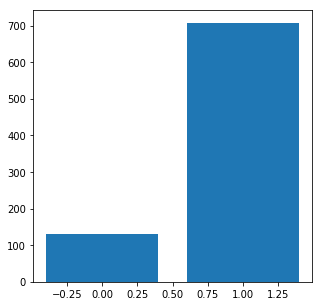

In [49]:
# RMSE of predictor vs RMSE of persistence
fig, ax = plt.subplots(1,1,figsize=(5,5))
ax.bar([0,1], height=[predict_rmse, persist_rmse])
plt.show()